# Introduction to Machine Learning

## Basic Ideas

### What is Machine Learning?##

Two definitions of Machine Learning are offered. [Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel) described it as: "the field of study that gives computers the ability to learn without being explicitly programmed." This is an older, informal definition.

Tom Mitchell provides a more modern definition: "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."

Example: playing checkers.

E = the experience of playing many games of checkers

T = the task of playing checkers.

P = the probability that the program will win the next game.


To use machine learning effectively **you have to understand how the underlying algorithms work**. It is tempting to learn a language such as Python or R and apply various packages to your data without really understanding what the packages are doing or even how the results should be interpreted. This would be a bit like a finance specialist using the Black and Scholes model to value options without understanding where it comes from or its limitations.


### Type of Machine Learning Models ###

There are four main categories of machine learning models:

- Supervised Learning
- Unsupervised Learning
- Semi-Supervised Learning
- Reinforcement Learning 

Supervised learning is concerned with using data to make predictions. We can distinguish between supervised learning models that are used to predict a variable and models that are used for classification. 

Unsupervised learning is concerned with recognizing patterns in data. The main object is not to forecast a particular variable, rather it is to understand the data environment better.

The data for supervised learning contains whare are referred to as **features** and **labels**. The **labels** are the values of the target that is to be predicted. The **features** are the variables from which the predictions are to be made. For example when predicting the price of a house the **features** could be the swuare meters of living space, the number of bedrooms, the number of bathrooms, the size of the garage and so on. The **label** would be the house price.

The data for unsupervised learning consists of features but no labels because the model is being used to identify patterns not to forecast something.

### Type of Data ###

There are two types of data:

- Numerical
- Categorical

Numerical data consists of numbers. Categorical data is data which can fall into a number of different categories, for example data to predict a house price might categorize driveways as asphalt, concrete, grass, etc. Categorical data must be converted to numbers for the purposes of analysis. 

The standard way of dealing with categorical features is to create a dummy variable for each category. The value of this variable is 1 if the feature is in the category and 0 otherwise. For example in the situation in which individuals are categorized as male or female, we could create two dummy variables. For man the first dummy variable would be 1 and the second would be 0. The opposite for women. This procedure is appropriate when there is no natural ordering between the feature values.

When there is a natural ordering, we can reflect this in the numbers assigned. For example if the size of an order is classified as small, medium or large, we can replace the feature by a numerical variable where *small = 1*, *medium = 2* and *large = 3*.

### Validation and Testing 

When data is used for forecasting there is a danger that the machine learning model will work very well for data, but will not generalize well to other data. An obvious point is that it is important that the data used in a machine learning model be representative of the situations to which the model is to be applied. It is also important to test a model out-of-sample, by this we mean that the model should be tested on data that is different from the sample data used to determine the parameters of the model.

Data scientist refer to the sample data as the **training set** and the data used to determine the accuracy of the model as the **test set**, often a **validation set** is used as well as we explain later;

In [34]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table("salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


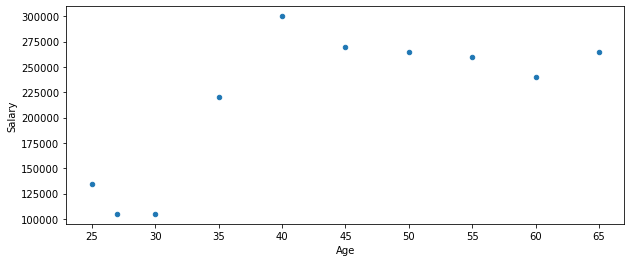

In [35]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 4]
ax=plt.gca()

df1.plot(x ='Age', y='Salary', kind = 'scatter', ax=ax)
plt.show()

[polynomial fitting with pandas](https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/)

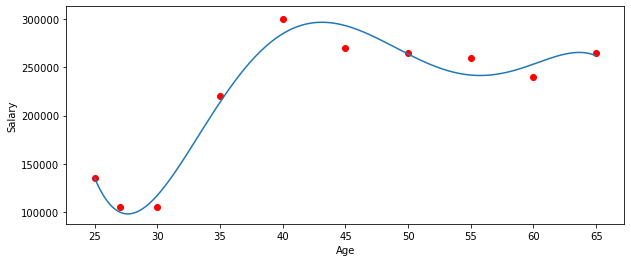

In [36]:
import numpy as np

x1 = df1['Age']
y1 = df1['Salary']

n = len(x1)

degree = 5

weights = np.polyfit(x1, y1, degree)
model   = np.poly1d(weights)

xx1 = np.arange(x1[0], x1[n-1], 0.1)
plt.plot(xx1, model(xx1))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x1,y1, color='red')
plt.show()

In [37]:
y1  = np.array(y1)
yy1 = np.array(model(x1))

rmse = np.sqrt(np.sum((y1-yy1)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
12902.203044368625


In [40]:
df2 = pd.read_table("salary_vs_age_2.csv", sep=";") 
x2 = df2['Age']
y2 = df2['Salary']
n  = len(x2)

y2  = np.array(y2)
yy2 = np.array(model(x2))

rmse = np.sqrt(np.sum((y2-yy2)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
38825.22050918072


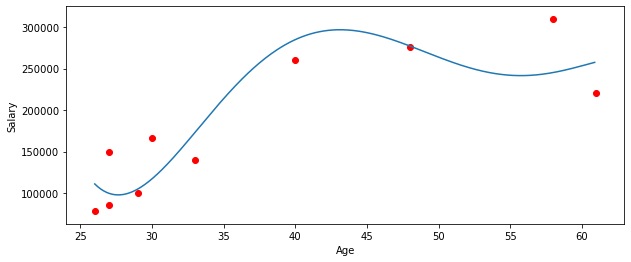

In [41]:
xx2 = np.arange(x2[0], x2[n-1], 0.1)
plt.plot(xx2, model(xx2))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x2,y2, color='red')
plt.show()

- The root mean squared error (rmse) for the training      data set is \$12,902
- The rmse for the test data set is \$38,794

We conclude that the model overfits the data. The complexity of the model should be increased only until out-of-sample tests indicate that it does not generalize well.

## Unsupervised Learning

### *k*-Means Clustering

*k*-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the **nearest** cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

#### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.

#### A Distance Measure

**TO DO**

#### K-means algorithm example problem
Let’s see the steps on how the K-means machine learning algorithm works using the Python programming language.
We’ll use the Scikit-learn library and some random data to illustrate a K-means clustering simple explanation.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Here is the code for generating some random data in a two-dimensional space:

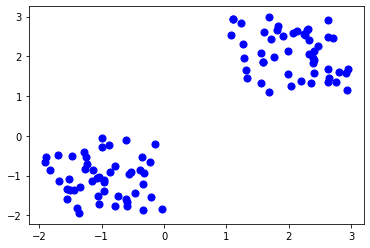

In [65]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

We’ll use some of the available functions in the Scikit-learn library to process the randomly generated data.

In [66]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In this case, we arbitrarily gave k (n_clusters) an arbitrary value of two.
Here is the output of the K-means parameters we get if we run the code:

In [67]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=2, n_jobs=1, precompute_distances='auto')

In [68]:
Kmean.cluster_centers_

array([[-0.98002277, -1.06165761],
       [ 2.06270635,  2.08117986]])

Let's display the cluster centroids

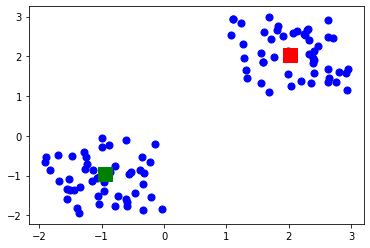

In [69]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

Here is the code for getting the labels property of the K-means clustering example dataset; that is, how the data points are categorized into the two clusters.

In [70]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

As you can see above, 50 data points belong to the 0 cluster while the rest belong to the 1 cluster.

For example, let’s use the code below for predicting the cluster of a data point:

In [71]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0])

## A Country Risk Example

In [105]:
# loading packages SPOSTARE ALL'INIZIO DEL DOCUMENTO

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [106]:
# load raw data
DATA_FOLDER = './data'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


### Simple exploratory analysis

**Print summary statistics**

Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [107]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


**Plot histogram**

Note that distributions for GDP Growth is quite skewed.

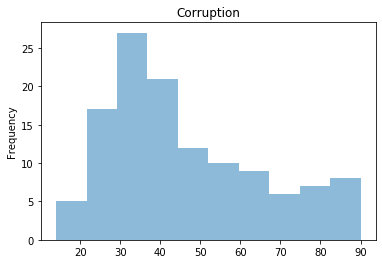

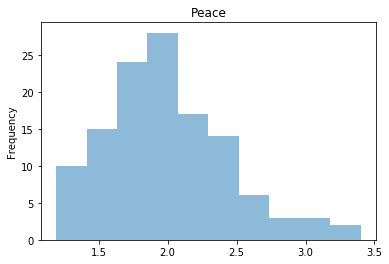

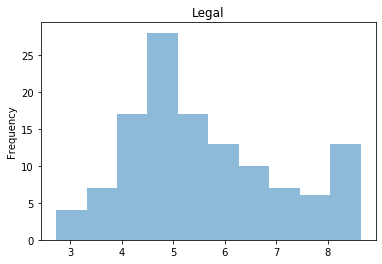

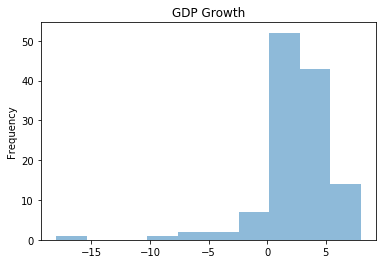

In [108]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

### K means cluster

**Pick features & normalization**

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [109]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.305319 -1.194666    0.317896
1  0.467304 -0.967413    0.564392
2 -0.104348 -0.693096   -1.440899
3  0.478469 -0.990273   -0.667782
4 -1.202990  1.778450    0.030368


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

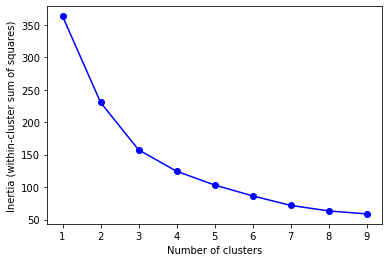

In [110]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

***k*-means with k=3**

In [111]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 157.551489241025
cluster centers:  [[-0.92810589  1.16641329 -0.01445833]
 [ 1.21562552 -1.01677118 -1.61496953]
 [ 0.25320926 -0.45186802  0.43127408]]
cluster labels:  [2 2 1 1 0 0 1 2 2 0 2 2 2 0 1 2 1 2 0 1 0 2 2 0 2 2 0 1 0 2 1 2 2 0 2 0 0
 2 2 0 2 2 2 2 0 0 2 2 2 0 2 0 2 0 2 2 2 0 2 2 1 1 0 2 2 0 2 2 0 2 2 2 2 2
 2 0 0 2 1 0 2 2 2 2 2 2 0 0 0 2 1 2 2 2 2 2 0 0 0 0 0 2 0 0 0 2 2 2 1 2 2
 2 1 0 0 0 0 1 2 1 2 1]


**Visualize the result (3D plot)**

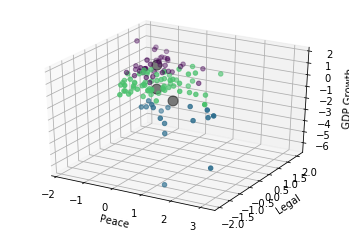

In [112]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

**Visualize the result (3 2D plots)**

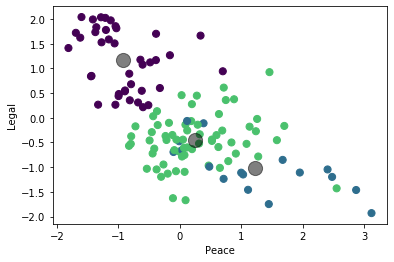

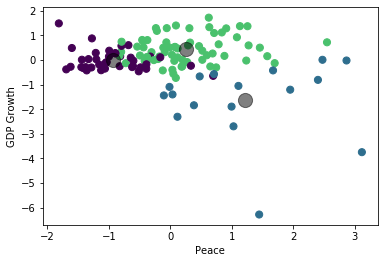

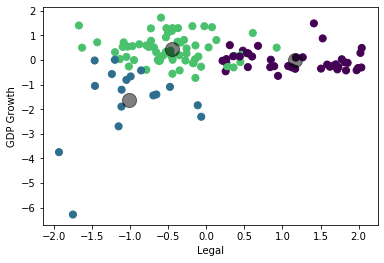

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

**Visualize the result (3 2D plots)**

plot country abbreviations instead of dots.

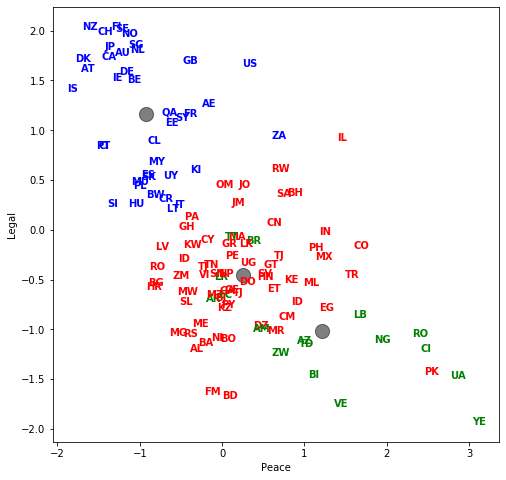

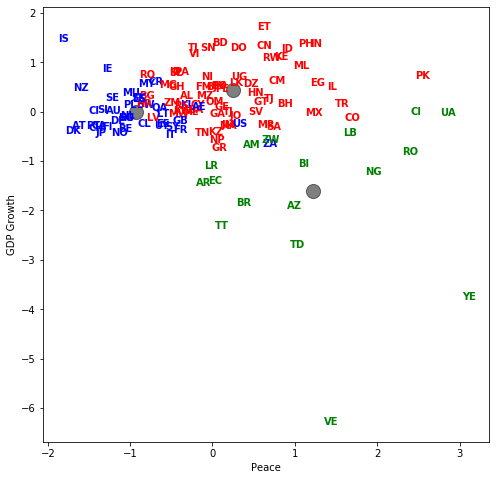

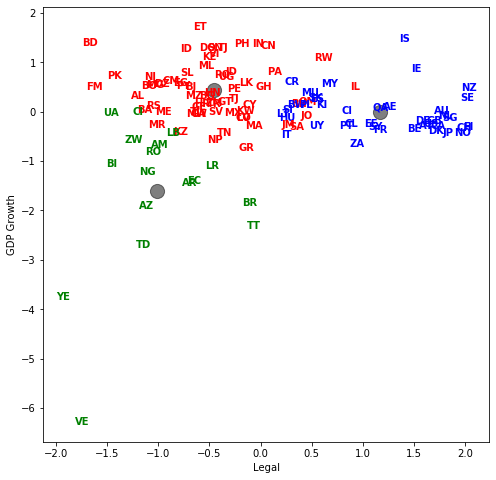

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [103]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
23                     Costa Rica     CR      0
88                          Qatar     QA      0
26                 Czech Republic     CI      0
87                       Portugal     PT      0
28                        Denmark     DK      0
86                         Poland     PL      0
79                         Norway     NO      0
76                    New Zealand     NZ      0
33                        Estonia     EE      0
75                    Netherlands     NL      0
35                        Finland     FI      0
36                         France     FR      0
68                      Mauritius     MU      0
65                       Malaysia     MY      0
39                        Germany     DE      0
62                      Lithuania     LT      0
57                  Korea (South)     KI      0
53                          Japan     JP      0
44                        Hungary     HU      0
45                        Iceland     IS

In [104]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3630420703158315
For n_clusters= 3 The average silhouette_score is : 0.382300101041878
For n_clusters= 4 The average silhouette_score is : 0.361833034268952
For n_clusters= 5 The average silhouette_score is : 0.36098592493463394
For n_clusters= 6 The average silhouette_score is : 0.3032386313570256
For n_clusters= 7 The average silhouette_score is : 0.3030731753237569
For n_clusters= 8 The average silhouette_score is : 0.31299199157406427
For n_clusters= 9 The average silhouette_score is : 0.3001003239539114
For n_clusters= 10 The average silhouette_score is : 0.294711375886461


## Supervised Learning

### Linear Regression

**TO DO**

### Cost Functions 


#### Linear Cost Function 

In Machine Learning a cost function or loss function is used to represent how far away a mathematical model is from the real data. One adjusts the mathematical model, usually by varying parameters within the model, so as to minimize the cost function. 

We want to find a relationship of the form 

\begin{equation}
y=\theta_0 +\theta_1x
\end{equation}

where the $\theta$s are the parameters that we want to find to give us the best fit to the data. We call this linear function $h_\theta(x)$ to emphasize the dependence on both the variable $x$ and the two parameters $\theta_0$ and $\theta_1$.


We want to measure how far away the data, the $y^{(n)}$s, are from the function $h_\theta(x)$. A common way to do this is via the quadratic *cost function*

\begin{equation}
J(\mathbf{\theta}) = \frac{1}{2N} \sum\limits_{n=1}^N \left[ h_\theta \left( x^{(n)} \right) - y^{(n)} \right]^2
\label{eq:ols}
\end{equation}

This is called *Ordinary Least Squares*.

The minimum is easily find analitically, differentiate $\eqref{eq:ols}$ with respect to both $\theta$s and set the result to zero:

\begin{equation}
\begin{array}{lcl} 
\frac{\partial J}{\partial \theta_0} & = & \sum\limits_{n=1}^N \left( \theta_0 + \theta_1 x^{(n)} - y^{(n)} \right) = 0 
\\ 
\frac{\partial J}{\partial \theta_1} & = & \sum\limits_{n=1}^N x^{(n)} \left( \theta_0 + \theta_1 x^{(n)} - y^{(n)} \right) = 0 
\end{array}
\end{equation}

The solution is trivially obtained for both $\theta$s

\begin{equation}
\begin{array}{lcl} 
\theta_0 = \frac{\left(\sum y \right) \left(\sum x^2 \right) -\left(\sum x \right) \left(\sum xy \right) }{N\left(\sum x^2 \right) \left(\sum x \right)^2 } 
\\ 
\theta_1 = \frac{N\left(\sum xy \right) - \left(\sum y \right)\left(\sum x \right)}{N\left(\sum x^2 \right) \left(\sum x \right)^2 }
\end{array}
\end{equation}




### Gradient Descent

(first of all remind of local and global minima)

The scheme works as follow: start with an initial guess for each parameter $\theta_k$. Then move $\theta_k$ in the direction of the slope:

\begin{equation}
\theta_k^{new} =\theta_k^{old}+\beta \frac{\partial J}{\partial \theta_k}
\end{equation}

**Update all $\theta_k$ simultaneously** and repet until convergence. Here $\beta$ is a *learning factor* that governs how far you move. if $\beta$ is too small it will take a long time to converge, if too large it will overshoot and might not converge at all. 

The loss function $J$ is a function of all of the data points. In the above description of gradient descent we have used all of the data points simultaneously. This is called *batch gradient* descent. But rather than use all of the data in the parameter updating we can use a technique called *stochastic gradient descent*. This is like batch gradient descent except that you only update using *one* of the data points each time. And that data point is chosen randomly.

\begin{equation}
J(\mathbf{\theta}) = \sum\limits_{n=1}^N J_n(\mathbf{\theta})
\end{equation}

Stochastic gradient descent means pick an *n* at random and then update according to 

\begin{equation}
\theta_k^{new} =\theta_k^{old}+\beta \frac{\partial J_n}{\partial \theta_k}
\end{equation}

Repeat, picking another data point at random, etc.

















### Ridge Regression 

Ridge regression is a regularization technique where we change the function that is to be minimized:

For each feature *j*, Ridge regression involves adding the term $\lambda b_j^2$ to the mean squared error. This change has the effect of encouraging the model to keep the weights $b_j$ as small as possible.  

The Ridge regression model should only be used for determining model parameters using the training set. Once the model parameters have been determined equation () *without* the $\lambda \sum_{j=1}^m b_j^2$ term should be used for prediction. 

The parameter $\lambda$ is referred to as a *hyperparameter* because it is used to train the model, but is not part of the model that is used for prediction.

**TO DO**

### Bias and Variance

Suppose there is a relationship between an independent variable $x$ and a dependent variable $y$:

\begin{equation}
    y=f(x) + \epsilon
\end{equation}

Where $\epsilon$ is an error term with mean zero and variance $\sigma^2$. The error term captures either genuine randomness in the data or noise due to measurement error.

Suppose we find a deterministic model for this relationship:

\begin{equation}
    y = \hat f(x)
\end{equation}

Now it comes a new data point $x^\prime$ not in the training set and we want to predict the corresponding $y^\prime$. The error we will observe in our model at point $x^\prime$ is going to be

\begin{equation}
    \hat f(x^\prime) - f(x^\prime) - \epsilon
\end{equation}

There are two different sources of error in this equation. The first one is included in the factor $\epsilon$, the second one, more interesting, is due to what is in our training set. A robust model should give us the same prediction whatever data we used for training out model. Let's look at the average error:

\begin{equation}
E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

where the expectation is taken over random samples of training data (having the same distributio as the training data). 

This is the definition of the **bias**

\begin{equation}
    \textrm{Bias} \left[\hat f (x^\prime) \right] = E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

We can also look at the mean square error

\begin{equation}
E \left[\left( \hat f (x^\prime ) - f(x^\prime) - \epsilon \right)^2\right] =
\left[ \textrm{Bias} \left( \hat f(x^\prime) \right) \right]^2 + \textrm{Var}\left[ \hat f(x^\prime) \right] + \sigma^2
\end{equation}

Where we remember that $\hat f (x^\prime)$ and $\epsilon$ are independent.

This show us that there are two important quantities, the **bias** and the **variance** that will affect our results and that we can control to some extent. 

**Bias is how far away the trained model is from the correct result on average**. Where *"on average"* means over many goes at training the model using different data. 


Unfortunately, we often find that there is a trade-off between bias and variance. As one is reduced, the other is increased. This is the matter of over- and under-fitting.

**Overfitting is when we train our algorithm too well on training data, perhaps having too many parameters for fitting**.




\begin{equation}
\end{equation}

In [72]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_table("bias_variance_dataset_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df.head())

          x    sample      theo
0  0.000000  0.500000  0.500000
1  0.062832  0.562791  0.562791
2  0.125664  0.225333  0.625333
3  0.188496  0.987381  0.687381
4  0.251327  0.348690  0.748690


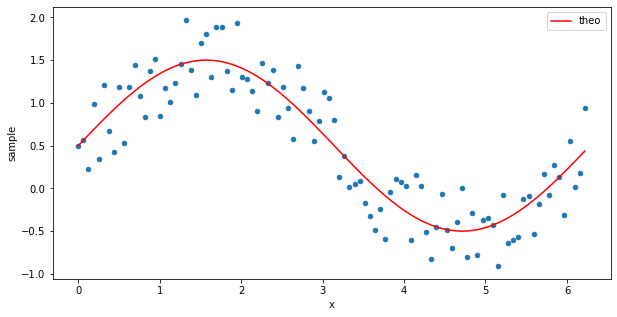

In [73]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

ax=plt.gca()

df.plot(x ='x', y='sample', kind = 'scatter', ax=ax)
df.plot(x ='x', y='theo', kind = 'line', color='red', ax=ax)

plt.show()

**TO DO**

## References